# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [29]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = input_file_directory + "mefs/glucose_lactate/"

In [5]:
path2 = output_file_directory + 'ATG7/MEF/Glucose_lactate/'

# II] Glucose

In [18]:
experiments = "_exp1", "_exp2", "_exp3"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "glucose" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    df_dmso.loc['mean()'] = df_dmso.mean() #mean for technical duplicate
    df_dmso = df_dmso.loc['mean()':,:] #select the mean
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf.loc['mean()'] = df_baf.mean() #mean for technical duplicate
    df_baf = df_baf.loc['mean()':,:] #select the mean row
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_glu_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1], dfs_dmso_l[2]], axis=0) 
dfs_glu_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1], dfs_baf_l[2]], axis=0)

dfs_glu_baf

   DMSO    WT  2,285627903  2,367087339
0  DMSO    EV  1,892740779  1,909989799
1  DMSO  iso1  2,137051576  2,063587002
2  DMSO  iso2  2,186799436  2,192979329
3   BAF    WT  2,137009214  2,093682721
4   BAF    EV   1,65803912  1,663249908
5   BAF  iso1  1,494734427  1,593197596
6   BAF  iso2  1,728111004  1,793055451 

   DMSO    WT   1,64650121  1,708473456
0  DMSO    EV  2,036298082  2,036298082
1  DMSO  iso1  1,290138313  1,288603043
2  DMSO  iso2  2,260724623  2,272345588
3   BAF    WT  1,636235222  1,691514548
4   BAF    EV  1,564893044  1,516080145
5   BAF  iso1  1,241719623  1,254805661
6   BAF  iso2  2,168122671          NaN 

   DMSO    WT  0,303933738  0,296900852
0  DMSO    EV  0,242214225  0,237450889
1  DMSO  iso1  0,222247933  0,213586654
2  DMSO  iso2  0,360839518  0,349306395
3   BAF    WT  0,321635021  0,309108899
4   BAF    EV  0,230721249  0,224072072
5   BAF  iso1  0,218781918  0,213971906
6   BAF  iso2  0,381481063   0,35637208 



1,WT,EV,iso1,iso2
mean(),2.11535,1.66064,1.54397,1.76058
mean(),1.66387,1.54049,1.24826,2.16812
mean(),0.315372,0.227397,0.216377,0.368927


In [19]:
#normalization on EV
dfs_glucose = dfs_glu_dmso, dfs_glu_baf
infos = "DMSO", "BAF"

dfs_glu_l = []

for i in range(len(dfs_glucose)):
    df = dfs_glucose[i]
    info = infos[i]
    
    print(info.upper())
    df = df.assign(MEF_WT = df['WT'] / df['EV'],
                   atg7_1 = df['iso1'] / df['EV'],
                   atg7_2 = df['iso2'] / df['EV'])
    
    df.reset_index(drop=True, inplace=True)
    df.loc['condition'] = info
    print(df, '\n')

    df = df.iloc[:,4:]
    df = df.rename(columns = {'MEF_WT':'MEF WT',
                              'ATG7ko':'ATG7-/-',
                              'atg7_1':'ATG7(1)',      
                              'atg7_2':'ATG7(2)'})
    
    dfs_glu_l.append(df)
df

DMSO
1                WT        EV      iso1      iso2    MEF_WT    atg7_1   atg7_2
0           2.32636   1.90137   2.10032   2.18989   1.22352   1.10464  1.15175
1           1.67749    2.0363   1.28937   2.26654  0.823793  0.633193  1.11307
2          0.300417  0.239833  0.217917  0.355073   1.25261  0.908623   1.4805
condition      DMSO      DMSO      DMSO      DMSO      DMSO      DMSO     DMSO 

BAF
1                WT        EV      iso1      iso2   MEF_WT    atg7_1   atg7_2
0           2.11535   1.66064   1.54397   1.76058  1.27381  0.929739  1.06018
1           1.66387   1.54049   1.24826   2.16812   1.0801  0.810304  1.40743
2          0.315372  0.227397  0.216377  0.368927  1.38688   0.95154  1.62239
condition       BAF       BAF       BAF       BAF      BAF       BAF      BAF 



1,MEF WT,ATG7(1),ATG7(2)
0,1.27381,0.929739,1.06018
1,1.0801,0.810304,1.40743
2,1.38688,0.95154,1.62239
condition,BAF,BAF,BAF


In [20]:
# group BAF and DMSO df
df_glucose = pandas.concat([dfs_glu_l[0], dfs_glu_l[1]], axis=1)
df_glucose.columns.name = None

# Rotate and convert wide to long df
df_glucose = df_glucose.T
df_glucose.reset_index(inplace=True)

df_glucose = df_glucose.melt(id_vars=["index", "condition"], var_name="experiment")
df_glucose['value'] = df_glucose['value'].astype(float)

#to have consumption and not concentration
df_glucose['value'] = 1 / df_glucose['value']
df_glucose

,index,condition,experiment,value
0,MEF WT,DMSO,0,0.817314
1,ATG7(1),DMSO,0,0.905274
2,ATG7(2),DMSO,0,0.868247
3,MEF WT,BAF,0,0.785046
4,ATG7(1),BAF,0,1.075571
5,ATG7(2),BAF,0,0.943235
6,MEF WT,DMSO,1,1.213898
7,ATG7(1),DMSO,1,1.579296
8,ATG7(2),DMSO,1,0.898419
9,MEF WT,BAF,1,0.925843


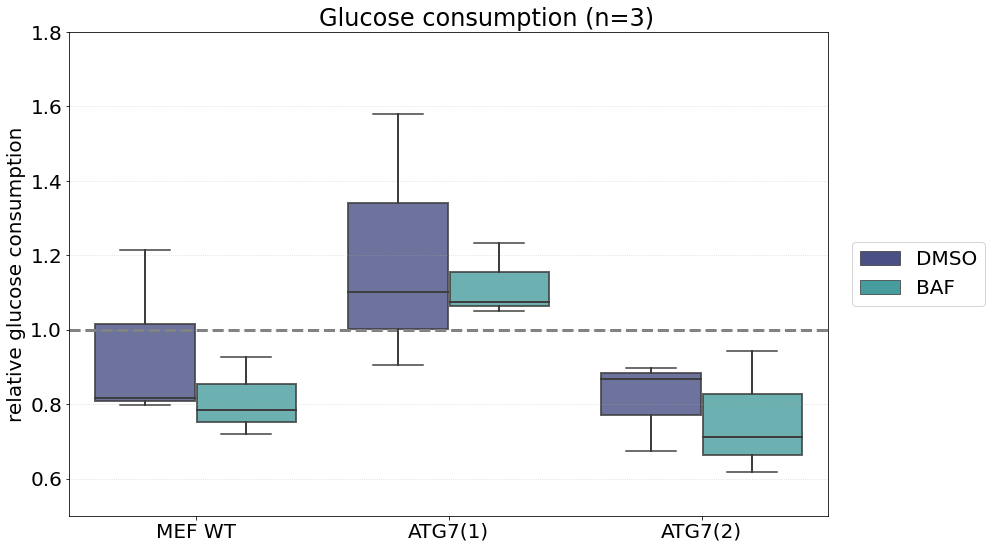

In [30]:
#graph
seaborn.boxplot(x="index", y="value", hue="condition", palette = 'mako',
                data = df_glucose, boxprops={'lw':2, 'alpha' : 0.8}, 
                medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative glucose consumption')
plt.ylim(0.5, 1.8)
plt.xlabel('')
plt.title('Glucose consumption' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.22, 0.5))

#save
plt.savefig(path2+'glucose_consumption.svg')

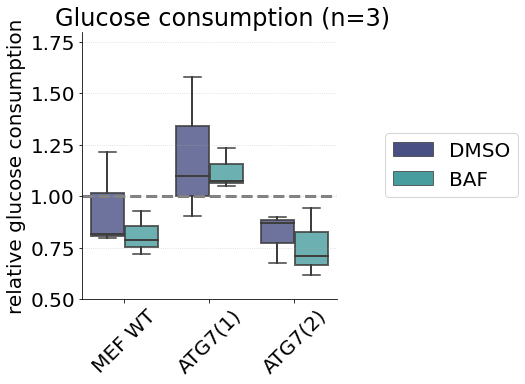

In [31]:
#graph
seaborn.catplot(x="index", y="value", hue="condition", kind="box", palette = 'mako',
                data = df_glucose, boxprops={'lw':2, 'alpha' : 0.8}, 
                medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False, legend=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative glucose consumption')
plt.ylim(0.5, 1.8)
plt.xlabel('')
plt.xticks(rotation = 45)
plt.title('Glucose consumption' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.75, 0.5))

#save
plt.savefig(path2+'glucose_consumption.svg')

In [23]:
conditions = "DMSO", "BAF"

for condition in conditions:
    print(condition.upper())   
    
    df = df_glucose.loc[df_glucose['condition'] == condition]

    df = df.sort_values(['index'], ascending = True)
    df.reset_index(drop=True, inplace=True)
    print(df.head(), '\n')

    # define label and separate mutants
    iso1_label = df.iloc[0]['index']
    iso2_label = df.iloc[3]['index']
    wt_label = df.loc[6]['index']

    df_iso1 = df.iloc[0:3, :]
    df_iso2 = df.iloc[3:6, :]
    df_wt = df.iloc[6:, :]

    # Statistique, Ttest
    ### ATG7 isoform
    statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_iso2['value'])
    print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
    ### ATG7(1) and WT
    statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_wt['value'])
    print("the pvalue between", iso1_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
    ### ATG7(2) and WT
    statistic, pvalue = scipy.stats.ttest_ind(df_iso2['value'], df_wt['value'])
    print("the pvalue between", iso2_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
    print('----------------','\n')


DMSO
     index condition experiment     value
0  ATG7(1)      DMSO          0  0.905274
1  ATG7(1)      DMSO          1  1.579296
2  ATG7(1)      DMSO          2  1.100567
3  ATG7(2)      DMSO          0  0.868247
4  ATG7(2)      DMSO          1  0.898419 

the pvalue between ATG7(1) and ATG7(2) is 1.46796E-01
the pvalue between ATG7(1) and MEF WT is 3.56309E-01
the pvalue between ATG7(2) and MEF WT is 4.44534E-01
---------------- 

BAF
     index condition experiment     value
0  ATG7(1)       BAF          0  1.075571
1  ATG7(1)       BAF          1  1.234105
2  ATG7(1)       BAF          2  1.050928
3  ATG7(2)       BAF          0  0.943235
4  ATG7(2)       BAF          1  0.710516 

the pvalue between ATG7(1) and ATG7(2) is 3.22321E-02
the pvalue between ATG7(1) and MEF WT is 2.06115E-02
the pvalue between ATG7(2) and MEF WT is 6.61973E-01
---------------- 



# I] Lactate

In [32]:
experiments = "_exp1", "_exp2", "_exp3"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "lactate" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    df_dmso.loc['mean()'] = df_dmso.mean() #mean for technical duplicate
    df_dmso = df_dmso.loc['mean()':,:] #select the mean
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf.loc['mean()'] = df_baf.mean() #mean for technical duplicate
    df_baf = df_baf.loc['mean()':,:] #select the mean row
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_lact_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1], dfs_dmso_l[2]], axis=0) 
dfs_lact_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1], dfs_baf_l[2]], axis=0)

dfs_lact_dmso

   DMSO    WT  2,975465182   2,90957878  2,915748744
0  DMSO    EV  2,361937633  2,423438021          NaN
1  DMSO  iso1  2,678644617  2,689600219          NaN
2  DMSO  iso2  2,941954624  2,898666563  2,918064515
3   BAF    WT  2,631933543  2,676204588          NaN
4   BAF    EV  2,108213649  2,049431856  2,068559265
5   BAF  iso1  1,944974047  1,972448752          NaN
6   BAF  iso2  2,429189892  2,385957393          NaN 

   DMSO    WT  1,869402047  1,889384144
0  DMSO    EV   2,28700129  2,289585472
1  DMSO  iso1  1,476567498  1,452776711
2  DMSO  iso2  2,887694808  2,720433041
3   BAF    WT  1,937300488  1,898147776
4   BAF    EV  1,773681215  1,781394701
5   BAF  iso1  1,421837538  1,452103711
6   BAF  iso2  2,777117441  2,696993325 

   DMSO    WT  0,228975166  0,225104245
0  DMSO    EV  0,172311847  0,175200642
1  DMSO  iso1  0,157488409  0,159071207
2  DMSO  iso2  0,283530162  0,280913178
3   BAF    WT  0,237137389  0,224779176
4   BAF    EV  0,166664217  0,164553027
5   BAF  iso

1,WT,EV,iso1,iso2
mean(),2.9336,2.39269,2.68412,2.91956
mean(),1.87939,2.28829,1.46467,2.80406
mean(),0.22704,0.173756,0.15828,0.282222


In [33]:
#normalization on EV
dfs_lactate = dfs_lact_dmso, dfs_lact_baf
infos = "DMSO", "BAF"

dfs_lact_l = []

for i in range(len(dfs_lactate)):
    df = dfs_lactate[i]
    info = infos[i]
    
    print(info.upper())
    df = df.assign(MEF_WT = df['WT'] / df['EV'],
                   atg7_1 = df['iso1'] / df['EV'],
                   atg7_2 = df['iso2'] / df['EV'])
    
    df.reset_index(drop=True, inplace=True)
    df.loc['condition'] = info
    print(df, '\n')

    df = df.iloc[:,4:]
    df = df.rename(columns = {'MEF_WT':'MEF WT',
                              'ATG7ko':'ATG7-/-',
                              'atg7_1':'ATG7(1)',      
                              'atg7_2':'ATG7(2)'})
    dfs_lact_l.append(df)
    
df

DMSO
1               WT        EV     iso1      iso2    MEF_WT    atg7_1   atg7_2
0           2.9336   2.39269  2.68412   2.91956   1.22607    1.1218   1.2202
1          1.87939   2.28829  1.46467   2.80406  0.821308  0.640072   1.2254
2          0.22704  0.173756  0.15828  0.282222   1.30666   0.91093  1.62424
condition     DMSO      DMSO     DMSO      DMSO      DMSO      DMSO     DMSO 

BAF
1                WT        EV      iso1     iso2   MEF_WT    atg7_1   atg7_2
0           2.65407    2.0754   1.95871  2.40757  1.27882  0.943775  1.16005
1           1.91772   1.77754   1.43697  2.73706  1.07887  0.808405   1.5398
2          0.230958  0.165609  0.157755  0.29401   1.3946  0.952579  1.77533
condition       BAF       BAF       BAF      BAF      BAF       BAF      BAF 



1,MEF WT,ATG7(1),ATG7(2)
0,1.27882,0.943775,1.16005
1,1.07887,0.808405,1.5398
2,1.3946,0.952579,1.77533
condition,BAF,BAF,BAF


In [34]:
# group BAF and DMSO df
df_lactate = pandas.concat([dfs_lact_l[0], dfs_lact_l[1]], axis=1)
df_lactate.columns.name = None

# Rotate and convert wide to long df
df_lactate = df_lactate.T
df_lactate.reset_index(inplace=True)

df_lactate = df_lactate.melt(id_vars=["index", "condition"], var_name="experiment")
df_lactate['value'] = df_lactate['value'].astype(float)
df_lactate

,index,condition,experiment,value
0,MEF WT,DMSO,0,1.226068
1,ATG7(1),DMSO,0,1.121802
2,ATG7(2),DMSO,0,1.220202
3,MEF WT,BAF,0,1.278822
4,ATG7(1),BAF,0,0.943775
5,ATG7(2),BAF,0,1.160052
6,MEF WT,DMSO,1,0.821308
7,ATG7(1),DMSO,1,0.640072
8,ATG7(2),DMSO,1,1.225395
9,MEF WT,BAF,1,1.078865


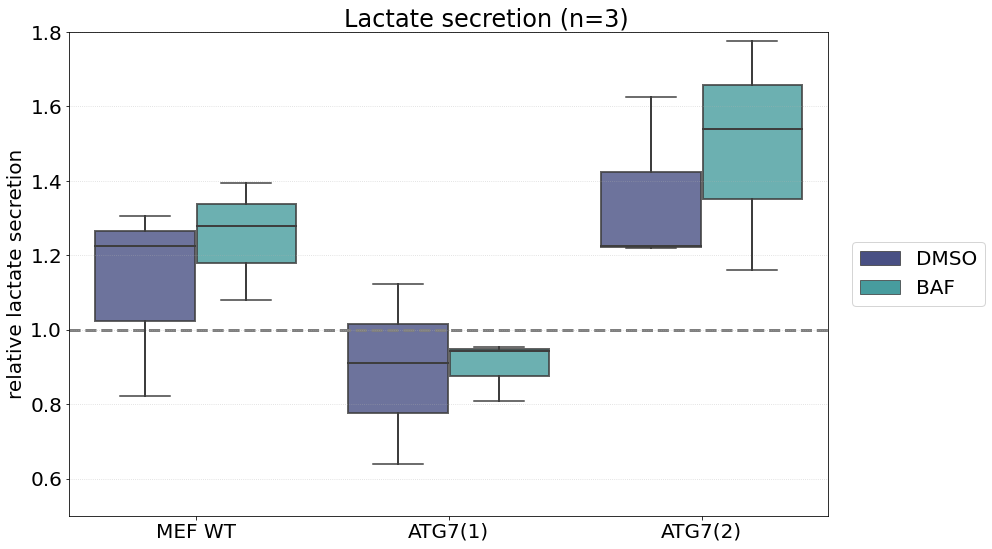

In [37]:
#graph
fig = seaborn.boxplot(x="index", y="value", hue="condition", palette = 'mako',
                data = df_lactate, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative lactate secretion')
plt.ylim(0.5, 1.8)
plt.xlabel('')
plt.title('Lactate secretion' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.22, 0.5))

#save
plt.savefig(path2+'lactate_secretion.svg')

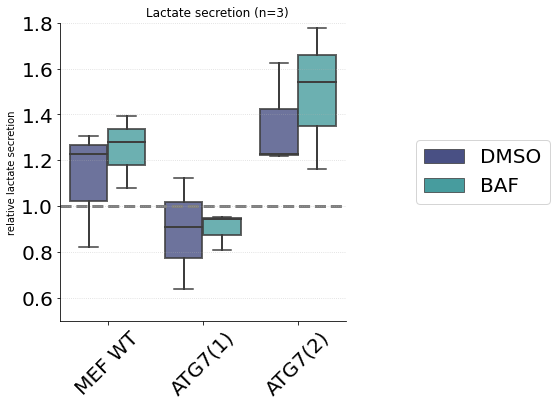

In [28]:
#graph
fig = seaborn.catplot(x="index", y="value", hue="condition", kind="box", palette = 'mako',
                data = df_lactate, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False, legend=False)

plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative lactate secretion')
plt.ylim(0.5, 1.8)
plt.xlabel('')
plt.xticks(rotation = 45)
plt.title('Lactate secretion' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.75, 0.5))

#save
plt.savefig(path2+'lactate_secretion.svg')

In [17]:
conditions = "DMSO", "BAF"

for condition in conditions:
    print(condition.upper())   
    
    df = df_lactate.loc[df_lactate['condition'] == condition]

    df = df.sort_values(['index'], ascending = True)
    df.reset_index(drop=True, inplace=True)
    print(df.head(), '\n')

    # define label and separate mutants
    iso1_label = df.iloc[0]['index']
    iso2_label = df.iloc[3]['index']
    wt_label = df.loc[6]['index']

    df_iso1 = df.iloc[0:3, :]
    df_iso2 = df.iloc[3:6, :]
    df_wt = df.iloc[6:, :]

    # Statistique, Ttest
    ### ATG7 isoform
    statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_iso2['value'])
    print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
    ### ATG7(1) and WT
    statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_wt['value'])
    print("the pvalue between", iso1_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
    ### ATG7(2) and WT
    statistic, pvalue = scipy.stats.ttest_ind(df_iso2['value'], df_wt['value'])
    print("the pvalue between", iso2_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
    print('----------------','\n')


DMSO
     index condition experiment     value
0  ATG7(1)      DMSO          0  1.121802
1  ATG7(1)      DMSO          1  0.640072
2  ATG7(1)      DMSO          2  0.910930
3  ATG7(2)      DMSO          0  1.220202
4  ATG7(2)      DMSO          1  1.225395 

the pvalue between ATG7(1) and ATG7(2) is 7.35811E-02
the pvalue between ATG7(1) and MEF WT is 3.29930E-01
the pvalue between ATG7(2) and MEF WT is 3.01172E-01
---------------- 

BAF
     index condition experiment     value
0  ATG7(1)       BAF          0  0.943775
1  ATG7(1)       BAF          1  0.808405
2  ATG7(1)       BAF          2  0.952579
3  ATG7(2)       BAF          0  1.160052
4  ATG7(2)       BAF          1  1.539801 

the pvalue between ATG7(1) and ATG7(2) is 3.33317E-02
the pvalue between ATG7(1) and MEF WT is 2.78229E-02
the pvalue between ATG7(2) and MEF WT is 2.97936E-01
---------------- 

